In [1]:
import pandas as pd
import numpy as np
import glob
import dropbox as db
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

ln: soccer_pitch.py: File exists


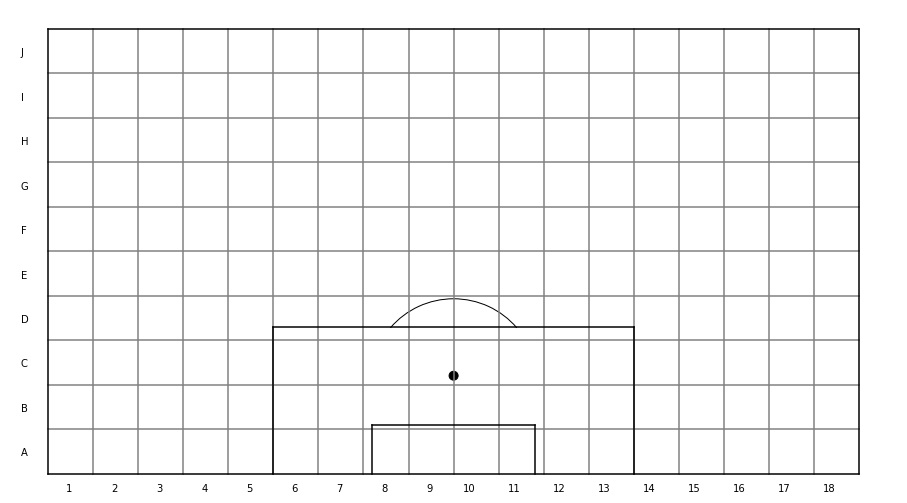

In [156]:
!ln -s /Users/matthiashugli/Virtualenvs/youth-base/youth-base/soccer_pitch.py soccer_pitch.py
from soccer_pitch import half_pitch, full_pitch
half_pitch()

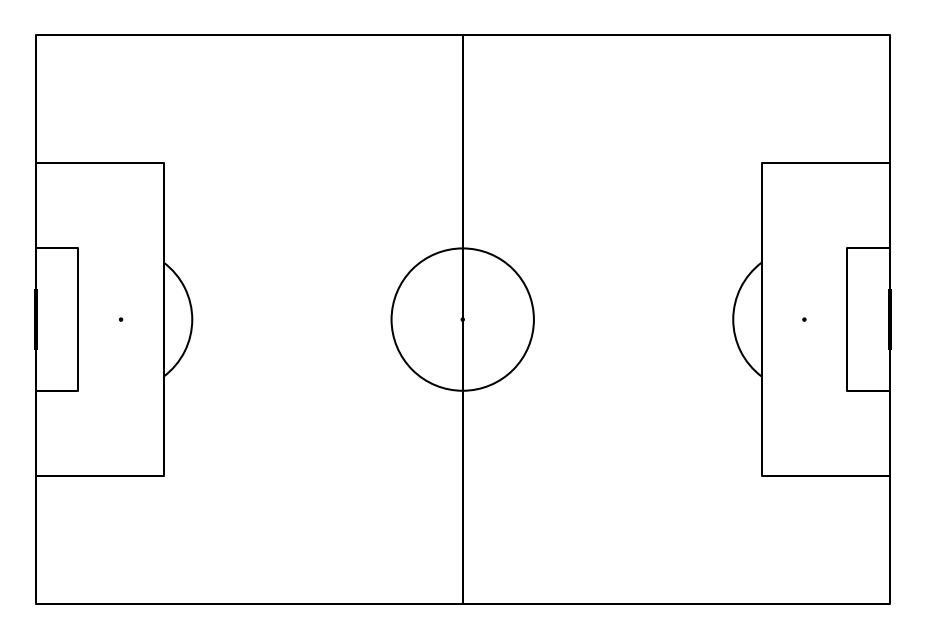

In [32]:
from mplsoccer import Pitch

pitch = Pitch(pitch_color='white', line_color='black')
fig, ax = pitch.draw()
fig.set_size_inches(16,9)
plt.show()

In [33]:
!ln -s /Users/matthiashugli/Virtualenvs/youth-base/youth-base/config.py config.py
from config import dbx_token
dbx = db.Dropbox(dbx_token)

event_path = '/Users/matthiashugli/Dropbox/bucket/dataset-wyscout/events_Germany.json'


events = pd.DataFrame()
for filename in glob.glob(event_path):
    file = pd.read_json(filename)
    file.insert(1, 'filename', filename)
    events = events.append(file)



ln: config.py: File exists


In [38]:
events[events['matchId'] == 2516739].tail(50)

,eventId,filename,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1557,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,[{'id': 1802}],209091,"[{'y': 88, 'x': 69}, {'y': 100, 'x': 80}]",2516739,Pass,2444,2H,2671.506956,85,179898042
1558,5,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Ball out of the field,[],0,"[{'y': 0, 'x': 20}, {'y': 100, 'x': 100}]",2516739,Interruption,2446,2H,2673.531869,50,179898136
1559,3,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Throw in,[{'id': 1801}],14727,"[{'y': 100, 'x': 72}, {'y': 87, 'x': 32}]",2516739,Free Kick,2444,2H,2683.027264,36,179898043
1560,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,[{'id': 1801}],134383,"[{'y': 87, 'x': 32}, {'y': 36, 'x': 34}]",2516739,Pass,2444,2H,2687.191153,85,179898044
1561,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,[{'id': 1801}],14724,"[{'y': 36, 'x': 34}, {'y': 17, 'x': 59}]",2516739,Pass,2444,2H,2690.439792,85,179898046
1562,7,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Touch,[],14718,"[{'y': 17, 'x': 59}, {'y': 16, 'x': 63}]",2516739,Others on the ball,2444,2H,2694.662798,72,179898049
1563,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,[{'id': 1801}],14718,"[{'y': 16, 'x': 63}, {'y': 8, 'x': 75}]",2516739,Pass,2444,2H,2696.193148,85,179898050
1564,1,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",231139,"[{'y': 8, 'x': 75}, {'y': 6, 'x': 36}]",2516739,Duel,2444,2H,2698.744254,13,179898052
1565,1,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",165425,"[{'y': 92, 'x': 25}, {'y': 94, 'x': 64}]",2516739,Duel,2446,2H,2701.229489,13,179898137
1566,1,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",231139,"[{'y': 6, 'x': 36}, {'y': 12, 'x': 68}]",2516739,Duel,2444,2H,2701.597113,13,179898054


In [34]:
#events[events['eventId'] == 9].head()
exp_df = events[(events['matchId'] == 2516739) & (events['eventId'].isin([9, 10]))].head(500)
exp_shots = exp_df[exp_df['eventId'] == 10]
exp_shots['pos'] = [i[0] for i in exp_shots['positions']]
exp_shots['x'] = [v['x'] for k, v in exp_shots['pos'].items()]
exp_shots['y'] = [v['y'] for k, v in exp_shots['pos'].items()]
exp_saves = exp_df[exp_df['eventId'] == 9]
exp_saves['pos'] = [i[1] for i in exp_saves['positions']]
exp_saves['x'] = [v['x'] for k, v in exp_saves['pos'].items()]
exp_saves['y'] = [v['y'] for k, v in exp_saves['pos'].items()]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [107]:
full_pitch()

NameError: name 'full_pitch' is not defined

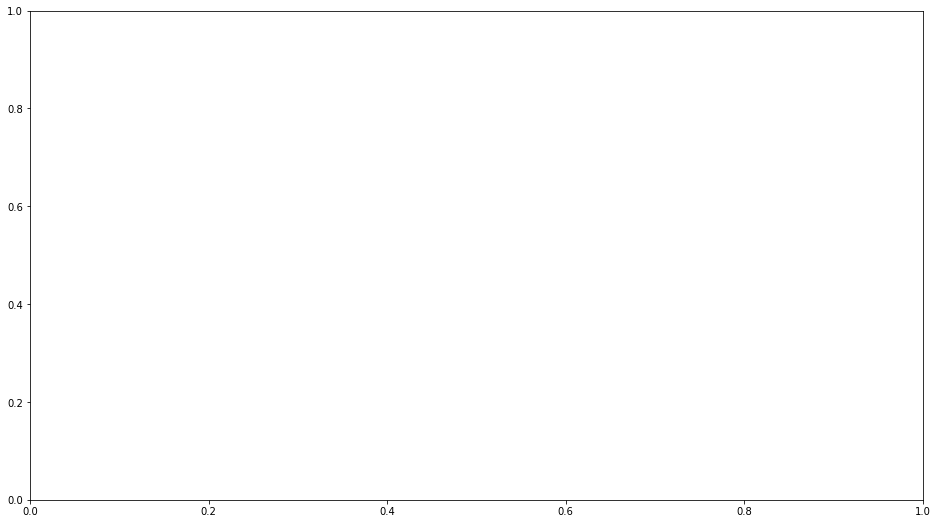

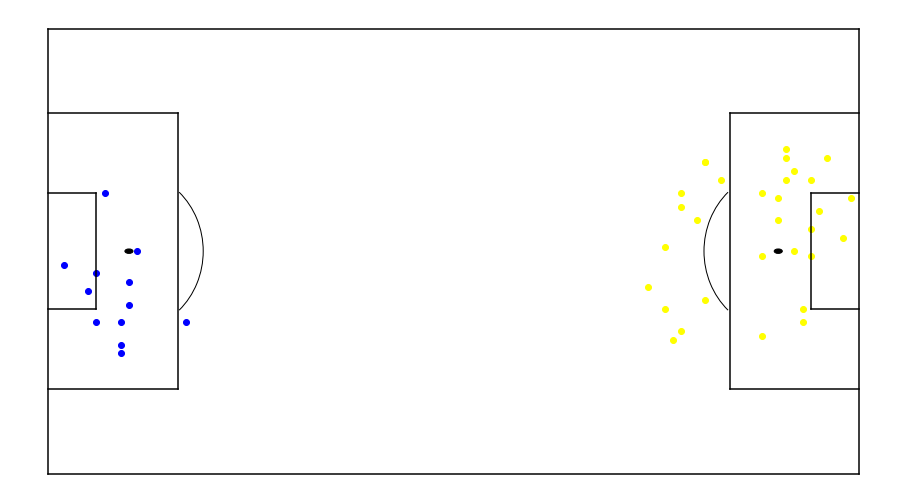

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)

# Create figure
fig=plt.figure()
fig.set_size_inches(16, 9)
ax=fig.add_subplot(1,1,1)

# Pitch Outline & Centre Line
plt.plot([0,0],[0,100], color="black")
plt.plot([0,100],[100,100], color="black")
plt.plot([100,100],[100,0], color="black")
plt.plot([100,0],[0,0], color="black")

# Penalty Area 1
plt.plot([16,16],[81,19], color="black")
plt.plot([0,16],[81,81], color="black")
plt.plot([16,0],[19,19], color="black")

# 6-yard Box
plt.plot([6,6],[63,37], color="black")
plt.plot([0,6],[63,63], color="black")
plt.plot([6,0],[37,37], color="black")

# Penalty Spot
PenSpot = plt.Circle((10,50),0.5,color="black")
ax.add_patch(PenSpot)

# Penalty Arc
penalty_arc = Arc((10,50),height=36,width=18.3,angle=0,theta1=295,theta2=65,color="black")
ax.add_patch(penalty_arc)

# Penalty Area 2
plt.plot([84,100],[81,81], color="black")
plt.plot([84,100],[19,19], color="black")
plt.plot([84,84],[19,81], color="black")

# 6-yard Box
plt.plot([94,100],[63,63], color="black")
plt.plot([94,100],[37,37], color="black")
plt.plot([94,94],[37,63], color="black")

# Penalty Spot
PenSpot = plt.Circle((90,50),0.5,color="black")
ax.add_patch(PenSpot)

# Penalty Arc
penalty_arc = Arc((90,50),height=36,width=18.3,angle=180,theta1=295,theta2=65,color="black")
ax.add_patch(penalty_arc)

#Tidy Axes
plt.axis('off')

plt.scatter(exp_saves['x'], exp_saves['y'], color='blue')
plt.scatter(exp_shots['x'], exp_shots['y'], color='yellow')

plt.show()

In [97]:
exp_shots.head()

,eventId,filename,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pos,x,y
104,10,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",209091,"[{'y': 66, 'x': 83}, {'y': 0, 'x': 0}]",2516739,Shot,2444,1H,247.703507,100,179896573,"{'y': 66, 'x': 83}",83,66
178,10,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",134383,"[{'y': 59, 'x': 95}, {'y': 0, 'x': 0}]",2516739,Shot,2444,1H,529.393731,100,179896639,"{'y': 59, 'x': 95}",95,59
216,10,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Shot,"[{'id': 402}, {'id': 201}, {'id': 1201}, {'id'...",105619,"[{'y': 66, 'x': 91}, {'y': 100, 'x': 100}]",2516739,Shot,2446,1H,668.234340,100,179896684,"{'y': 66, 'x': 91}",91,66
220,10,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Shot,"[{'id': 402}, {'id': 201}, {'id': 1212}, {'id'...",14786,"[{'y': 49, 'x': 88}, {'y': 100, 'x': 100}]",2516739,Shot,2446,1H,672.925920,100,179896693,"{'y': 49, 'x': 88}",88,49
313,10,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Shot,"[{'id': 402}, {'id': 1216}, {'id': 1802}]",20475,"[{'y': 42, 'x': 74}, {'y': 0, 'x': 0}]",2516739,Shot,2444,1H,949.131592,100,179896798,"{'y': 42, 'x': 74}",74,42


In [99]:
exp_saves.head()

,eventId,filename,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pos,x,y
105,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,"[{'id': 1206}, {'id': 1801}]",14768,"[{'y': 100, 'x': 100}, {'y': 34, 'x': 17}]",2516739,Save attempt,2446,1H,249.343358,91,179896543,"{'y': 34, 'x': 17}",17,34
179,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",14768,"[{'y': 100, 'x': 100}, {'y': 41, 'x': 5}]",2516739,Save attempt,2446,1H,531.670523,90,179896637,"{'y': 41, 'x': 5}",5,41
217,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 1201}, {'id': 1801}]",14736,"[{'y': 0, 'x': 0}, {'y': 34, 'x': 9}]",2516739,Save attempt,2444,1H,669.593671,90,179896677,"{'y': 34, 'x': 9}",9,34
350,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 101}, {'id': 1202}, {'id': 1802}]",14768,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 2}]",2516739,Save attempt,2446,1H,1079.867480,90,179896805,"{'y': 47, 'x': 2}",2,47
380,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 1201}, {'id': 1801}]",14736,"[{'y': 0, 'x': 0}, {'y': 34, 'x': 6}]",2516739,Save attempt,2444,1H,1203.760861,90,179896854,"{'y': 34, 'x': 6}",6,34


In [58]:
shot_against = events[events['eventId'] == 9].head(200)
shot_exploded = shot_against.explode('tags')
shot_exploded = shot_exploded.explode('positions')
shot_exploded['y'] = [v['y'] for k, v in shot_exploded['positions'].items()]
shot_exploded['x'] = [v['x'] for k, v in shot_exploded['positions'].items()]


In [61]:
#shot_exploded = shot_exploded[(shot_exploded['y'] != 100) & (shot_exploded['x'] != 0)]
shot_exploded.sort_values('x', ascending=False).head(20)

,eventId,filename,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,y,x
105,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,{'id': 1206},14768,"{'y': 100, 'x': 100}",2516739,Save attempt,2446,1H,249.343358,91,179896543,100,100
19178,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,{'id': 1205},18704,"{'y': 100, 'x': 100}",2516750,Save attempt,2450,2H,1888.115047,91,182026206,100,100
10373,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,{'id': 1801},14914,"{'y': 100, 'x': 100}",2516745,Save attempt,2481,1H,1224.840224,91,180024293,100,100
19029,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,{'id': 1801},18704,"{'y': 100, 'x': 100}",2516750,Save attempt,2450,2H,1305.594101,91,182026060,100,100
10373,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,{'id': 1204},14914,"{'y': 100, 'x': 100}",2516745,Save attempt,2481,1H,1224.840224,91,180024293,100,100
33814,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,{'id': 1801},49968,"{'y': 100, 'x': 100}",2516759,Save attempt,2447,2H,2003.405599,91,185790398,100,100
10217,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,{'id': 1802},14914,"{'y': 100, 'x': 100}",2516745,Save attempt,2481,1H,474.709591,90,180024044,100,100
10217,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,{'id': 1205},14914,"{'y': 100, 'x': 100}",2516745,Save attempt,2481,1H,474.709591,90,180024044,100,100
10217,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,{'id': 101},14914,"{'y': 100, 'x': 100}",2516745,Save attempt,2481,1H,474.709591,90,180024044,100,100
19029,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,{'id': 1205},18704,"{'y': 100, 'x': 100}",2516750,Save attempt,2450,2H,1305.594101,91,182026060,100,100


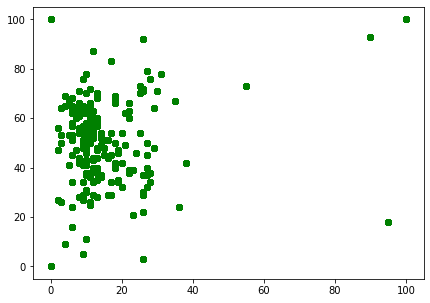

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(7,5)

for i in range(len(shot_exploded)):
    plt.scatter(shot_exploded['x'], shot_exploded['y'], color='green')
    #plt.plot(int(shot_exploded['x'][i]), int(shot_exploded['y'][i]), color='green')

plt.show()

In [26]:
explode['new_tags'] = [v['id'] for k, v in explode['tags'].items()]
explode = explode.explode('positions')
explode

,eventId,filename,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,new_tags
0,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},15231,"{'y': 50, 'x': 50}",2516739,Pass,2446,1H,2.409746,85,179896442,1801
0,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},15231,"{'y': 48, 'x': 50}",2516739,Pass,2446,1H,2.409746,85,179896442,1801
1,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14786,"{'y': 48, 'x': 50}",2516739,Pass,2446,1H,2.506082,85,179896443,1801
1,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14786,"{'y': 22, 'x': 22}",2516739,Pass,2446,1H,2.506082,85,179896443,1801
2,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14803,"{'y': 22, 'x': 22}",2516739,Pass,2446,1H,6.946706,85,179896444,1801
2,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14803,"{'y': 46, 'x': 6}",2516739,Pass,2446,1H,6.946706,85,179896444,1801
3,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14768,"{'y': 46, 'x': 6}",2516739,Pass,2446,1H,10.786491,85,179896445,1801
3,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14768,"{'y': 10, 'x': 20}",2516739,Pass,2446,1H,10.786491,85,179896445,1801
4,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14803,"{'y': 10, 'x': 20}",2516739,Pass,2446,1H,12.684514,85,179896446,1801
4,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14803,"{'y': 4, 'x': 27}",2516739,Pass,2446,1H,12.684514,85,179896446,1801


In [3]:
player_path = '/Users/matthiashugli/Dropbox/bucket/dataset-wyscout/players.json'

players = pd.DataFrame()
player_file = pd.read_json(player_path)
players = players.append(player_file)

In [4]:
players['position'] = players.role.apply(pd.Series)['name']
players = players[players['position'] == 'Goalkeeper']
players.drop(columns=['passportArea', 'weight', 'middleName', 'currentTeamId', 'role', 'birthArea', 'shortName', 'currentNationalTeamId'], inplace=True)

In [5]:
events = events.merge(players, left_on=events.playerId, right_on=players.wyId, how='inner')

In [6]:
events = events.explode('tags')
#events['tag_id'] = [value.get('id') for key, value in events['tags'].items()]
events.head()

,key_0,eventId,filename,subEventName,tags,playerId,positions,matchId,eventName,teamId,...,eventSec,subEventId,id,firstName,lastName,birthDate,height,wyId,foot,position
0,14768,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,...,10.786491,85,179896445,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper
1,14768,3,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Goal kick,NaN,14768,"[{'y': 100, 'x': 100}, {'y': 42, 'x': 16}]",2516739,Free Kick,2446,...,181.205506,34,179896508,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper
2,14768,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Simple pass,{'id': 1801},14768,"[{'y': 42, 'x': 6}, {'y': 10, 'x': 3}]",2516739,Pass,2446,...,186.589156,85,179896511,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper
3,14768,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Launch,{'id': 1801},14768,"[{'y': 34, 'x': 5}, {'y': 28, 'x': 45}]",2516739,Pass,2446,...,189.818782,84,179896514,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper
4,14768,8,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,High pass,{'id': 1801},14768,"[{'y': 26, 'x': 9}, {'y': 87, 'x': 39}]",2516739,Pass,2446,...,236.008683,83,179896540,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper


In [7]:
shot_against = events[events['eventId'] == 9]
shot_against.groupby(['eventId']).tags.apply(lambda x: pd.DataFrame(x.values[0])).reset_index()

ValueError: If using all scalar values, you must pass an index

In [9]:
reduced = shot_against.head()
#print(reduced.head())
exploded = reduced.explode('tags')
#exploded.head()
exploded['tag_id'] = [value for key, value in exploded['tags'].items()]
exploded.reset_index(inplace=True)
exploded.tail()

,index,key_0,eventId,filename,subEventName,tags,playerId,positions,matchId,eventName,...,subEventId,id,firstName,lastName,birthDate,height,wyId,foot,position,tag_id
0,5,14768,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,id,14768,"[{'y': 100, 'x': 100}, {'y': 34, 'x': 17}]",2516739,Save attempt,...,91,179896543,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper,id
1,5,14768,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Save attempt,id,14768,"[{'y': 100, 'x': 100}, {'y': 34, 'x': 17}]",2516739,Save attempt,...,91,179896543,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper,id
2,6,14768,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,id,14768,"[{'y': 100, 'x': 100}, {'y': 41, 'x': 5}]",2516739,Save attempt,...,90,179896637,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper,id
3,6,14768,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,id,14768,"[{'y': 100, 'x': 100}, {'y': 41, 'x': 5}]",2516739,Save attempt,...,90,179896637,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper,id
4,6,14768,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,id,14768,"[{'y': 100, 'x': 100}, {'y': 41, 'x': 5}]",2516739,Save attempt,...,90,179896637,Bernd,Leno,1992-03-04,190,14768,right,Goalkeeper,id


In [ ]:
#events.head()
#players.head()
#events.count()
#events.groupby(['eventName', 'subEventName']).eventId.count()
events[events.eventName == 'Save attempt'].tail()

,key_0,eventId,filename,subEventName,tags,playerId,positions,matchId,eventName,teamId,...,eventSec,subEventId,id,firstName,lastName,birthDate,height,wyId,foot,position
26675,14822,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 101}, {'id': 1205}, {'id': 1802}]",14822,"[{'y': 100, 'x': 100}, {'y': 40, 'x': 10}]",2517020,Save attempt,2481,...,2517.330781,90,247152490,Andreas,Luthe,1987-03-10,195,14822,right,Goalkeeper
26698,14822,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 1203}, {'id': 1801}]",14822,"[{'y': 100, 'x': 100}, {'y': 42, 'x': 4}]",2517039,Save attempt,2481,...,2294.344382,90,251254015,Andreas,Luthe,1987-03-10,195,14822,right,Goalkeeper
26704,14822,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 101}, {'id': 1204}, {'id': 1802}]",14822,"[{'y': 100, 'x': 100}, {'y': 53, 'x': 10}]",2517039,Save attempt,2481,...,244.789908,90,251254292,Andreas,Luthe,1987-03-10,195,14822,right,Goalkeeper
26717,14822,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 101}, {'id': 1201}, {'id': 1802}]",14822,"[{'y': 100, 'x': 100}, {'y': 67, 'x': 10}]",2517039,Save attempt,2481,...,1203.607650,90,251254535,Andreas,Luthe,1987-03-10,195,14822,right,Goalkeeper
26745,333477,9,/Users/matthiashugli/Dropbox/bucket/dataset-wy...,Reflexes,"[{'id': 1205}, {'id': 1801}]",333477,"[{'y': 0, 'x': 0}, {'y': 35, 'x': 18}]",2517040,Save attempt,2449,...,1860.826622,90,251299375,Alexander,N\u00fcbel,1996-09-30,193,333477,right,Goalkeeper


# Statsbomb Data

Todo: 
* Join related Events from goalkeeper actions with the respective action of the dataset. i.e. add the shot event to the goalkeeper event goal/save ...

In [3]:
filelocation = '/Users/matthiashugli/Dropbox/bucket/sample-data/statsbomb-testdata.json'


df = pd.DataFrame()
file = pd.read_json(filelocation)
df = df.append(file)

In [4]:
df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,interception,foul_won,block,foul_committed,shot,ball_recovery,injury_stoppage,substitution,clearance,50_50
0,324d489a-a31f-4457-ba09-30a013c49110,1,1,2021-12-04 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 764, 'name': 'Orlando Pride'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f5673797-d5a0-48b3-8b2e-7da845f4ce44,2,1,2021-12-04 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 764, 'name': 'Orlando Pride'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6747d743-36eb-4a8d-a1d7-34023816602c,3,1,2021-12-04 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 764, 'name': 'Orlando Pride'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37c391fa-820e-428d-b12c-f7afca489a9e,4,1,2021-12-04 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 764, 'name': 'Orlando Pride'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c5f5d300-f6d4-4d72-aa9e-cd3a31f8a62b,5,1,2021-12-04 00:00:00.886,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 764, 'name': 'Orlando Pride'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df['event_name'] = [v['name'] for k, v in df['type'].items()]
df['event_detail'] = [v['name'] for k, v in df['play_pattern'].items()]
statsbomb_gk = df[df['event_name'] == 'Goal Keeper']
statsbomb_gk = statsbomb_gk[['id', 'timestamp', 'related_events','player','location', 'goalkeeper', 'event_name', 'event_detail']]
statsbomb_gk['type'] = [v['type']['name'] for k, v in statsbomb_gk['goalkeeper'].items()]
statsbomb_gk = statsbomb_gk[statsbomb_gk['type'] != 'Shot Faced'].reset_index()
goalkeeper_exp = pd.json_normalize(statsbomb_gk['goalkeeper'])
goalkeeper_exp = goalkeeper_exp[goalkeeper_exp['outcome.name'].notna()].reset_index()
statsbomb_gk = statsbomb_gk.merge(goalkeeper_exp, left_index=True, right_index=True)
statsbomb_gk['x'] = [i[0] for i in statsbomb_gk['location']]
statsbomb_gk['y'] = [i[1] for i in statsbomb_gk['location']]
statsbomb_gk.drop(columns=['index_x', 'goalkeeper', 'index_y', 'type.id', 'outcome.id', 'technique.id', 'position.id', 'body_part.id', 'type.name'], inplace=True)

In [64]:
df[df.id == 'e0d8641c-ae41-49ab-bd30-7aecd05a9bbf']

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,block,foul_committed,shot,ball_recovery,injury_stoppage,substitution,clearance,50_50,event_name,event_detail
1899,e0d8641c-ae41-49ab-bd30-7aecd05a9bbf,1900,2,2021-12-04 00:05:01.209,50,1,"{'id': 16, 'name': 'Shot'}",106,"{'id': 764, 'name': 'Orlando Pride'}","{'id': 4, 'name': 'From Throw In'}",...,NaN,NaN,"{'open_goal': True, 'statsbomb_xg': 0.7634185,...",NaN,NaN,NaN,NaN,NaN,Shot,From Throw In


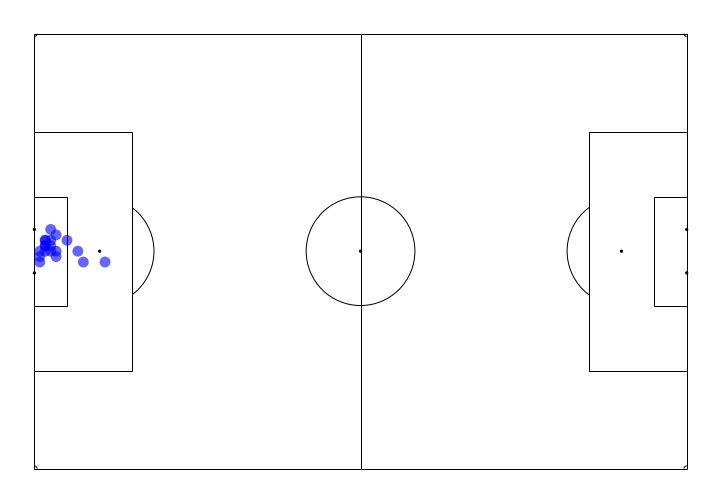

In [151]:
from northpitch.pitch import Pitch
fig, ax = plt.subplots(figsize=(15,9))
ax.set_axis_off()

pitch = Pitch(scale=(120, 80))
pitch.create_pitch(ax)
pitch.draw_points(ax, statsbomb_gk['location'])
plt.ylim(pitch.ylim)
plt.xlim(pitch.xlim)
plt.show()

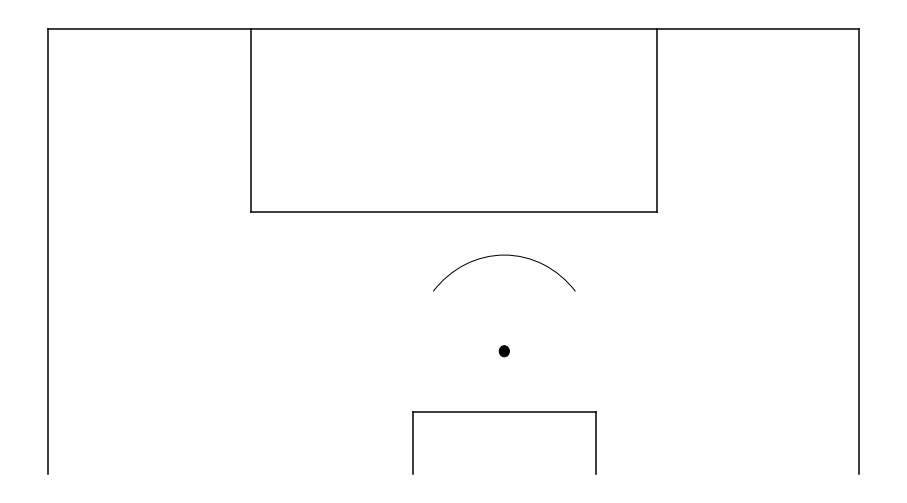

In [172]:
# Create figure
fig=plt.figure()
fig.set_size_inches(16, 9)
ax=fig.add_subplot(1,1,1)

# Pitch Outline & Centre Line
plt.plot([0,0],[0,40], color="black")
plt.plot([0,80],[40,40], color="black")
plt.plot([80,80],[40,0], color="black")
#plt.plot([80,0],[0,0], color="blue")

# Penalty Area
plt.plot([60,20],[23.5,23.5], color="black")
plt.plot([20,20],[40,23.5], color="black")
plt.plot([60,60],[23.5,40], color="black")

# 6-yard Box
plt.plot([54,36],[5.5,5.5], color="black")
plt.plot([36,36],[0,5.5], color="black")
plt.plot([54,54],[5.5,0], color="black")

# Penalty Spot
PenSpot = plt.Circle((45,11),0.5,color="black")
ax.add_patch(PenSpot)

# Penalty Arc
penalty_arc = Arc((45,10.5),height=18.3,width=18.3,angle=90,theta1=310,theta2=50,color="black")
ax.add_patch(penalty_arc)

#Tidy Axes
plt.axis('off')

#Display Pitch
plt.show()
